In [1]:
''' ------------------------------------------------- Data Collection ------------------------------------------------- '''

' ------------------------------------------------- Data Collection ------------------------------------------------- '

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ! pip install chembl_webresource_client

In [4]:
from chembl_webresource_client.new_client import new_client

D:\python\conda\envs\chem_env\Lib\site-packages\chembl_webresource_client\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __version__ = __import__('pkg_resources').get_distribution('chembl_webresource_client').version


In [5]:
target = new_client.target
target_query = target.search('ADRB2')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Bos taurus,Beta-2 adrenergic receptor,14.0,False,CHEMBL3373,"[{'accession': 'Q28044', 'component_descriptio...",SINGLE PROTEIN,9913
1,[],Mus musculus,Beta-2 adrenergic receptor,14.0,False,CHEMBL3707,"[{'accession': 'P18762', 'component_descriptio...",SINGLE PROTEIN,10090
2,[],Canis lupus familiaris,Beta-2 adrenergic receptor,14.0,False,CHEMBL2289,"[{'accession': 'P54833', 'component_descriptio...",SINGLE PROTEIN,9615
3,[],Rattus norvegicus,Beta-2 adrenergic receptor,14.0,False,CHEMBL3754,"[{'accession': 'P10608', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Sus scrofa,Beta-2 adrenergic receptor,14.0,False,CHEMBL3801,"[{'accession': 'Q28997', 'component_descriptio...",SINGLE PROTEIN,9823
5,[],Cavia porcellus,Beta-2 adrenergic receptor,14.0,False,CHEMBL5414,"[{'accession': 'Q8K4Z4', 'component_descriptio...",SINGLE PROTEIN,10141
6,[],Mesocricetus auratus,Beta-2 adrenergic receptor,14.0,False,CHEMBL5943,"[{'accession': 'P04274', 'component_descriptio...",SINGLE PROTEIN,10036
7,[],Homo sapiens,Beta-2 adrenergic receptor,13.0,False,CHEMBL210,"[{'accession': 'P07550', 'component_descriptio...",SINGLE PROTEIN,9606
8,[],Homo sapiens,Adrenergic receptor beta; ADRB1 & ADRB2,13.0,False,CHEMBL2096974,"[{'accession': 'P08588', 'component_descriptio...",SELECTIVITY GROUP,9606
9,[],Homo sapiens,Beta-2 adrenergic receptor and beta-3 adrenerg...,11.0,False,CHEMBL2111388,"[{'accession': 'P07550', 'component_descriptio...",SELECTIVITY GROUP,9606


In [6]:
# select the ADRB2 receptor of homo-sapiens (single-protein)

selected_target = targets.target_chembl_id[7]
selected_target

'CHEMBL210'

In [7]:
# Retrieve the bioactivity data for this specific target

activity = new_client.activity

# res stands for results
res = activity.filter(target_chembl_id = selected_target).filter(standard_type = 'IC50')
res # it is a query set

[{'action_type': None, 'activity_comment': None, 'activity_id': 146081, 'activity_properties': [], 'assay_chembl_id': 'CHEMBL647882', 'assay_description': 'In vitro binding affinity towards cloned human beta-2 adrenergic receptor using [125I]iodocyanopindolol as radioligand to stimulate increase in cAMP in CHO cells', 'assay_type': 'B', 'assay_variant_accession': None, 'assay_variant_mutation': None, 'bao_endpoint': 'BAO_0000190', 'bao_format': 'BAO_0000219', 'bao_label': 'cell-based format', 'canonical_smiles': 'O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2CCCC2)n1', 'data_validity_comment': None, 'data_validity_description': None, 'document_chembl_id': 'CHEMBL1131776', 'document_journal': 'Bioorg Med Chem Lett', 'document_year': 1999, 'ligand_efficiency': {'bei': '13.75', 'le': '0.26', 'lle': '0.26', 'sei': '10.19'}, 'molecule_chembl_id': 'CHEMBL433252', 'molecule_pref_name': None, 'parent_molecule_chembl_id': 'CHEMBL433252', 'pchembl_value': '6.35', 'potential_duplicate': 0, 'qudt_u

In [8]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,146081,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,450.0
1,None,None,146085,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,7500.0
2,None,None,147302,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,6500.0
3,None,None,147306,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,100.0
4,None,None,147310,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,None,None,25751690,[],CHEMBL5442689,GPCR PRESTO-Tango dose-response in antagonist ...,F,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,10.0
1628,None,Not Active,25774532,[],CHEMBL5464396,Adrenoceptor reporter cell assay (ADRB2),F,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,10.0
1629,None,None,25778414,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5465562,Selectivity interaction (BET inhibitor selecti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,31.6
1630,None,None,25787548,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5474383,Selectivity interaction (Adrenergic Alpha 2B r...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,30.0


In [9]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,146081,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,450.0
1,None,None,146085,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,7500.0
2,None,None,147302,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,6500.0


In [10]:
df.standard_type.unique() # we see the filter IC50

array(['IC50'], dtype=object)

In [11]:
df.columns.to_list()

['action_type',
 'activity_comment',
 'activity_id',
 'activity_properties',
 'assay_chembl_id',
 'assay_description',
 'assay_type',
 'assay_variant_accession',
 'assay_variant_mutation',
 'bao_endpoint',
 'bao_format',
 'bao_label',
 'canonical_smiles',
 'data_validity_comment',
 'data_validity_description',
 'document_chembl_id',
 'document_journal',
 'document_year',
 'ligand_efficiency',
 'molecule_chembl_id',
 'molecule_pref_name',
 'parent_molecule_chembl_id',
 'pchembl_value',
 'potential_duplicate',
 'qudt_units',
 'record_id',
 'relation',
 'src_id',
 'standard_flag',
 'standard_relation',
 'standard_text_value',
 'standard_type',
 'standard_units',
 'standard_upper_value',
 'standard_value',
 'target_chembl_id',
 'target_organism',
 'target_pref_name',
 'target_tax_id',
 'text_value',
 'toid',
 'type',
 'units',
 'uo_units',
 'upper_value',
 'value']

In [12]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,146081,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,450.0
1,None,None,146085,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,7500.0
2,None,None,147302,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,6500.0
3,None,None,147306,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,100.0
4,None,None,147310,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,None,None,25751690,[],CHEMBL5442689,GPCR PRESTO-Tango dose-response in antagonist ...,F,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,10.0
1628,None,Not Active,25774532,[],CHEMBL5464396,Adrenoceptor reporter cell assay (ADRB2),F,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,10.0
1629,None,None,25778414,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5465562,Selectivity interaction (BET inhibitor selecti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,31.6
1630,None,None,25787548,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5474383,Selectivity interaction (Adrenergic Alpha 2B r...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,30.0


In [13]:
df2.assay_description.unique() # a lot of assays have been performed

array(['In vitro binding affinity towards cloned human beta-2 adrenergic receptor using [125I]iodocyanopindolol as radioligand to stimulate increase in cAMP in CHO cells',
       'Binding affinity towards cloned human Beta-2 adrenergic receptor',
       'Binding affinity towards Beta-2 adrenergic receptor prepared from CHO cells expressing the cloned human receptor in the presence of [125I]iodocyanopindolol',
       'Evaluated for its agonist activity and the binding affinity against human Beta-2 adrenergic receptor in membranes from chinese hamster ovary cell',
       'In vitro binding affinity at beta-2 adrenergic receptors in the presence of [125I]iodocyanopindolol.',
       'Beta-2 adrenergic receptor binding affinity in CHO cells expressing cloned human receptor in the presence of 125 I-iodocyanopindolol',
       'Receptor binding assay(Beta-2 adrenergic receptor) carried out with membranes prepared from human recombinant Sf9 cells expressing the cloned human receptor in the prese

In [14]:
# create a histogram of the top 4 assays performed most

top_assays = df2.assay_description.value_counts().head(4)

C:\Users\panos\AppData\Local\Temp\ipykernel_10956\3701662408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_assays.values, y = top_assays.index, palette='viridis')


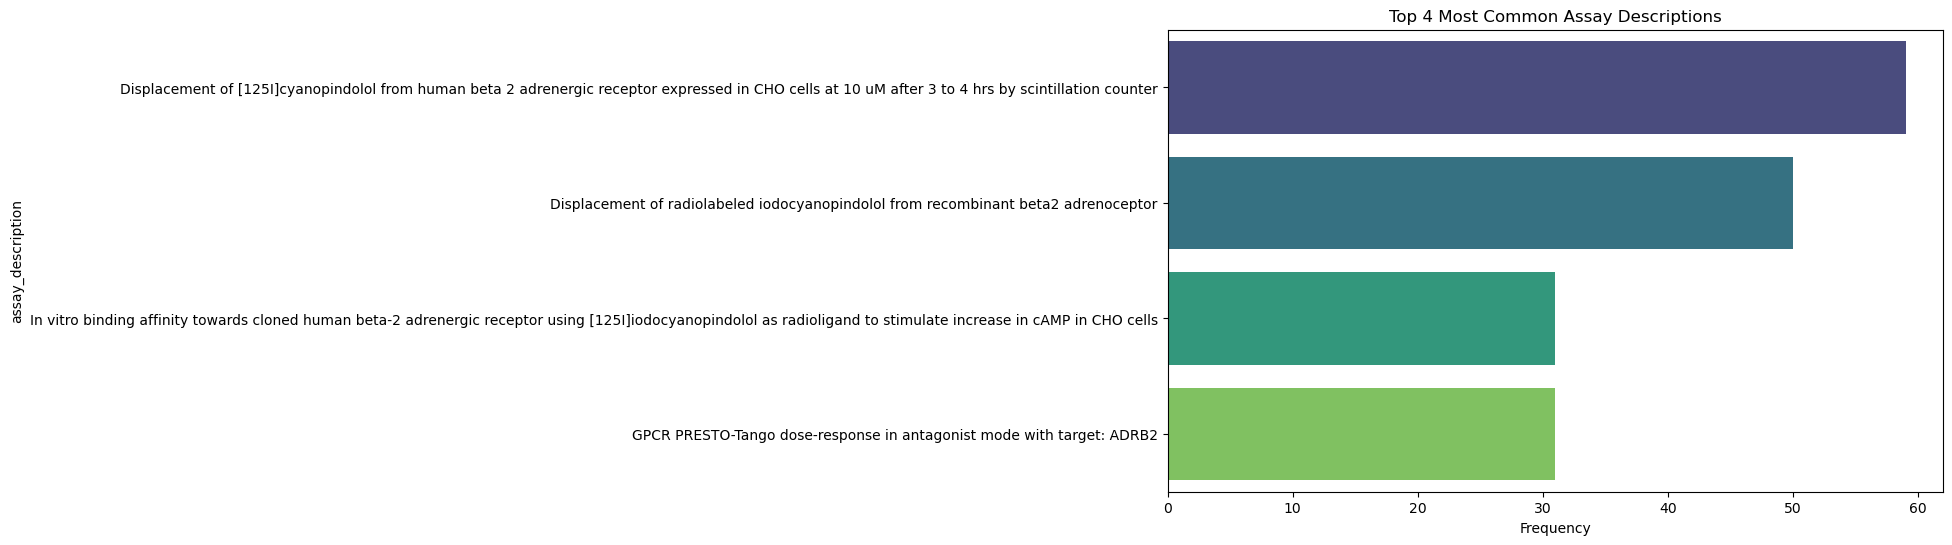

In [15]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_assays.values, y = top_assays.index, palette='viridis')
plt.xlabel('Frequency')
plt.title('Top 4 Most Common Assay Descriptions')
plt.show()

In [16]:
# make sure there are no NAs in the standard value 

df2.standard_value.isna().to_list().count(False)

782

In [17]:
df2.standard_value.isna().to_list().count(True) # if 0 -> no NAs

0

In [18]:
df2.canonical_smiles 

0       O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...
1       O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...
2        CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21
3       CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...
4       CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1
                              ...                        
1627    COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...
1628    CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...
1629    COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...
1630    CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...
1631    CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...
Name: canonical_smiles, Length: 782, dtype: object

In [19]:
# We must make sure we select only the molecules for which we know their SMILES strings

df2.canonical_smiles.isna().to_list().count(True)
df2.canonical_smiles.notna().to_list().count(False)

0

In [20]:
df2 = df2[df2['canonical_smiles'].notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,146081,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,450.0
1,None,None,146085,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,7500.0
2,None,None,147302,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,6500.0
3,None,None,147306,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,100.0
4,None,None,147310,[],CHEMBL647882,In vitro binding affinity towards cloned human...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,nM,UO_0000065,None,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,None,None,25751690,[],CHEMBL5442689,GPCR PRESTO-Tango dose-response in antagonist ...,F,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,10.0
1628,None,Not Active,25774532,[],CHEMBL5464396,Adrenoceptor reporter cell assay (ADRB2),F,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,10.0
1629,None,None,25778414,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5465562,Selectivity interaction (BET inhibitor selecti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,31.6
1630,None,None,25787548,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5474383,Selectivity interaction (Adrenergic Alpha 2B r...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-2 adrenergic receptor,9606,None,None,IC50,uM,UO_0000065,None,30.0


In [21]:
selection = ["canonical_smiles", "standard_type", "standard_value", 
             "standard_units", "molecule_chembl_id"]

df2 = df2[selection]
df2

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id
0,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,450.0,nM,CHEMBL433252
1,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,7500.0,nM,CHEMBL54750
2,CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21,IC50,6500.0,nM,CHEMBL56594
3,CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...,IC50,100.0,nM,CHEMBL52407
4,CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1,IC50,240.0,nM,CHEMBL56449
...,...,...,...,...,...
1627,COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...,IC50,10000.0,nM,CHEMBL5089005
1628,CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...,IC50,10000.0,nM,CHEMBL5410211
1629,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,31600.0,nM,CHEMBL2017291
1630,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,30000.0,nM,CHEMBL3643413


In [22]:
df2.standard_units.unique() # only nM

array(['nM'], dtype=object)

In [23]:
bioactivity_class = []

for i in df2.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")

In [24]:
set_class = set(bioactivity_class)
set_class
for i in set_class:
    count = bioactivity_class.count(i)
    print(f"{i}: {count}")

active: 405
intermediate: 199
inactive: 178


In [25]:
bioactivity_df = pd.DataFrame(bioactivity_class, columns = ["bioactivity_class"])
bioactivity_df

,bioactivity_class
0,active
1,intermediate
2,intermediate
3,active
4,active
...,...
777,inactive
778,inactive
779,inactive
780,inactive


In [26]:
df2 # see that the indexes need to be reassigned

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id
0,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,450.0,nM,CHEMBL433252
1,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,7500.0,nM,CHEMBL54750
2,CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21,IC50,6500.0,nM,CHEMBL56594
3,CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...,IC50,100.0,nM,CHEMBL52407
4,CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1,IC50,240.0,nM,CHEMBL56449
...,...,...,...,...,...
1627,COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...,IC50,10000.0,nM,CHEMBL5089005
1628,CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...,IC50,10000.0,nM,CHEMBL5410211
1629,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,31600.0,nM,CHEMBL2017291
1630,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,30000.0,nM,CHEMBL3643413


In [27]:
df2_i = df2.reset_index(drop = True) # i stands for indexes
df2_i

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id
0,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,450.0,nM,CHEMBL433252
1,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,7500.0,nM,CHEMBL54750
2,CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21,IC50,6500.0,nM,CHEMBL56594
3,CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...,IC50,100.0,nM,CHEMBL52407
4,CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1,IC50,240.0,nM,CHEMBL56449
...,...,...,...,...,...
777,COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...,IC50,10000.0,nM,CHEMBL5089005
778,CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...,IC50,10000.0,nM,CHEMBL5410211
779,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,31600.0,nM,CHEMBL2017291
780,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,30000.0,nM,CHEMBL3643413


In [28]:
# now both data frames have ther same indexes so theiw concatenation won't cause problems

df3 = pd.concat([df2_i, bioactivity_df], axis = 1)
df3.shape
df3

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id,bioactivity_class
0,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,450.0,nM,CHEMBL433252,active
1,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,7500.0,nM,CHEMBL54750,intermediate
2,CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21,IC50,6500.0,nM,CHEMBL56594,intermediate
3,CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...,IC50,100.0,nM,CHEMBL52407,active
4,CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1,IC50,240.0,nM,CHEMBL56449,active
...,...,...,...,...,...,...
777,COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...,IC50,10000.0,nM,CHEMBL5089005,inactive
778,CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...,IC50,10000.0,nM,CHEMBL5410211,inactive
779,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,31600.0,nM,CHEMBL2017291,inactive
780,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,30000.0,nM,CHEMBL3643413,inactive


In [29]:
# check for any NAs in any column

df3.iloc[:, -1].isna().sum()

np.int64(0)

In [30]:
# bioactivity_classes visualization

class_counts = df3.bioactivity_class.value_counts()
class_counts

bioactivity_class
active          405
intermediate    199
inactive        178
Name: count, dtype: int64

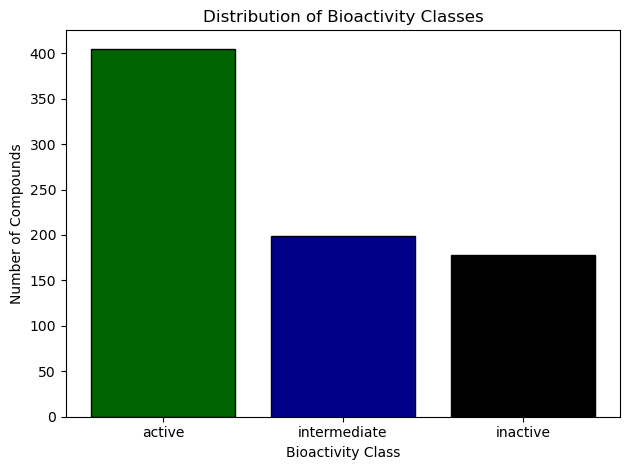

In [31]:
plt.bar(class_counts.index, class_counts.values, 
        color = ["darkgreen", "darkblue", "black"],
        edgecolor = "black",
        )
plt.title("Distribution of Bioactivity Classes")
plt.xlabel("Bioactivity Class")
plt.ylabel("Number of Compounds")
plt.tight_layout()
plt.show()

In [32]:
df3.standard_value

0        450.0
1       7500.0
2       6500.0
3        100.0
4        240.0
        ...   
777    10000.0
778    10000.0
779    31600.0
780    30000.0
781    30000.0
Name: standard_value, Length: 782, dtype: object

In [33]:
# dtype: object -> we need to convert it to numeric values
df3.standard_value = pd.to_numeric(df3.standard_value, errors = 'coerce')
df3.standard_value.isna().to_list().count(True) # if 0 then we aregood to go

0

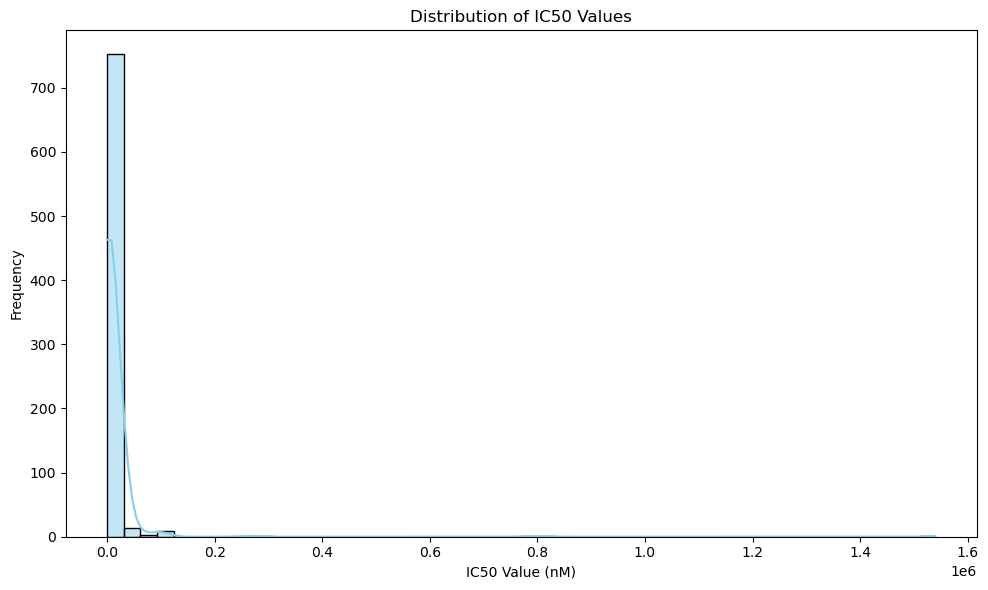

In [34]:
# compare with a plot of the standard values

plt.figure(figsize=(10, 6))
sns.histplot(df3.standard_value, bins=50, kde=True, color='skyblue')
plt.xlabel('IC50 Value (nM)')
plt.ylabel('Frequency')
plt.title('Distribution of IC50 Values')
plt.tight_layout()
plt.show()


In [35]:
# since there is a large scale of different values the distribution is skewed. 

df3.standard_value.describe()

count    7.820000e+02
mean     1.100064e+04
std      7.042732e+04
min      1.300000e-03
25%      7.298250e+01
50%      1.000000e+03
75%      8.000000e+03
max      1.540000e+06
Name: standard_value, dtype: float64

In [36]:
# we compress the scale using log10 base transformation

df3.standard_value = np.log10(df3.standard_value)
df3.standard_value.describe()

count    782.000000
mean       2.723513
std        1.412350
min       -2.886057
25%        1.863201
50%        3.000000
75%        3.903090
max        6.187521
Name: standard_value, dtype: float64

In [37]:
df3[df3.standard_value < 0] # if the value is negative -> the original IC50 (in nM) value was lower than 1 -> very potent
# these are very potent molecules. It would be better to store for future use.

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id,bioactivity_class
361,COc1ccc(CC(C)(C)NC[C@H](O)COc2cccc3[nH]c(=O)[n...,IC50,-2.886057,nM,CHEMBL486278,active
462,COc1ccccc1OCCNCC(O)COc1cccc2[nH]c3ccccc3c12,IC50,-0.617983,nM,CHEMBL723,active
464,CC(C)NCC(O)COc1cccc2[nH]ccc12,IC50,-0.260428,nM,CHEMBL500,active
467,CC(C)(C)NC[C@H](O)COc1cccc2c1CCCC2=O,IC50,-0.100727,nM,CHEMBL1201237,active
475,CC(C)NC[C@H](O)COc1cccc2ccccc12,IC50,-0.449772,nM,CHEMBL452861,active
476,CC(C)(C)NC[C@H](O)COc1nsnc1N1CCOCC1,IC50,-0.534617,nM,CHEMBL499,active
501,O=c1[nH]c2c(O)ccc(CCNCCc3cccc(CNCCc4c(Cl)cccc4...,IC50,-0.199971,nM,CHEMBL1946768,active
504,C[C@@H](NCc1ccccc1-c1ccc(CCNCCc2ccc(O)c3[nH]c(...,IC50,-0.100015,nM,CHEMBL1947151,active
510,O=c1[nH]c2c(O)ccc([C@@H](O)CNCCc3cccc(CNCCc4c(...,IC50,-0.700057,nM,CHEMBL1947157,active
512,O=c1[nH]c2c(O)ccc([C@@H](O)CNCCc3cccc(CNCCc4cc...,IC50,-0.199971,nM,CHEMBL1944690,active


In [38]:
potent_molecules = df3[df3.standard_value < 0] 
potent_molecules = potent_molecules.reset_index(drop = True)
potent_molecules # 27 very potent molecules

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id,bioactivity_class
0,COc1ccc(CC(C)(C)NC[C@H](O)COc2cccc3[nH]c(=O)[n...,IC50,-2.886057,nM,CHEMBL486278,active
1,COc1ccccc1OCCNCC(O)COc1cccc2[nH]c3ccccc3c12,IC50,-0.617983,nM,CHEMBL723,active
2,CC(C)NCC(O)COc1cccc2[nH]ccc12,IC50,-0.260428,nM,CHEMBL500,active
3,CC(C)(C)NC[C@H](O)COc1cccc2c1CCCC2=O,IC50,-0.100727,nM,CHEMBL1201237,active
4,CC(C)NC[C@H](O)COc1cccc2ccccc12,IC50,-0.449772,nM,CHEMBL452861,active
5,CC(C)(C)NC[C@H](O)COc1nsnc1N1CCOCC1,IC50,-0.534617,nM,CHEMBL499,active
6,O=c1[nH]c2c(O)ccc(CCNCCc3cccc(CNCCc4c(Cl)cccc4...,IC50,-0.199971,nM,CHEMBL1946768,active
7,C[C@@H](NCc1ccccc1-c1ccc(CCNCCc2ccc(O)c3[nH]c(...,IC50,-0.100015,nM,CHEMBL1947151,active
8,O=c1[nH]c2c(O)ccc([C@@H](O)CNCCc3cccc(CNCCc4c(...,IC50,-0.700057,nM,CHEMBL1947157,active
9,O=c1[nH]c2c(O)ccc([C@@H](O)CNCCc3cccc(CNCCc4cc...,IC50,-0.199971,nM,CHEMBL1944690,active


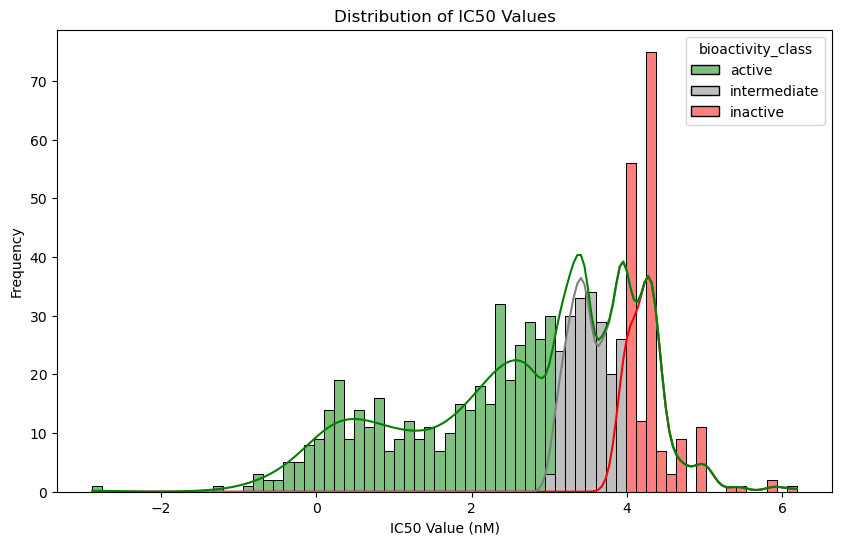

In [39]:
# let's now see the histogram of the log10 scaled IC50 values.

plt.figure(figsize=(10, 6))
sns.histplot(data = df3, x = 'standard_value', bins=70, kde=True, color='skyblue', 
             hue = df3.bioactivity_class, palette = {'active':'green', 'intermediate':'grey', 'inactive':'red'}, multiple='stack'
             )
plt.xlabel('IC50 Value (nM)')
plt.ylabel('Frequency')
plt.title('Distribution of IC50 Values')
plt.show()

In [40]:
''' Definitely less skewed '''

' Definitely less skewed '

In [41]:
''' --------------------------------------------- Exploratory Data Analysis --------------------------------------------- '''

' --------------------------------------------- Exploratory Data Analysis --------------------------------------------- '

In [42]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw 
from rdkit.Chem import Descriptors, AllChem, Lipinski
from rdkit.Chem.Draw import IPythonConsole

In [43]:
# Calculate the Lipinksi Descriptors

def lipinski(smiles_list, verbose = False):
    
    mol_data = []
    
    for smile in smiles_list:
       
        mol = Chem.MolFromSmiles(smile)
        if mol is None:
            if verbose:
                print(f"Invalid SMILES: {smile}")
            continue
        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        mol_data.append([desc_MolWt, desc_MolLogP,
                        desc_NumHDonors, desc_NumHAcceptors])
    
    column_names = ["Molecular Weight", "LogP",
                    "Number of H Donors", "Number of H Acceptors"]
    descriptors = pd.DataFrame(data = mol_data, columns = column_names)
    return descriptors


In [44]:
df3.canonical_smiles.to_list()

['O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2CCCC2)n1',
 'O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2CCCC2)c1',
 'CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21',
 'CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)no1',
 'CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1',
 'CCCCCCC(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21',
 'CCCCCCCCc1cnc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)o1',
 'CN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21',
 'CCCCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21',
 'CCCCCCCCc1csc(Nc2ccc(S(=O)(=O)Nc3ccccc3)cc2)n1',
 'CCCCCCc1cccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)n1',
 'CCCCCCc1ccnc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)n1',
 'CCCCCCc1cccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)c1',
 'CCCCCCNC(=O)Nc1ccc(S(=O)(=O)Nc2ccc(CCNC[C@H](O)c3cccnc3)cc2)cc1',
 'O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1nc(CCCC2CCCC2)cs1',
 'CCCCCCNC(=O)N(C)c1ccc(S(=O)(=O)Nc2ccc(CCNC[C@H](O)c3cccnc3)cc2)cc1',
 'CNC(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21',
 'CCCCCCCCc1csc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)n1',
 'CCCC

In [45]:
smiles_list = df3.canonical_smiles.to_list()

In [46]:
lipinski(smiles_list)
lipinski_partial_df = lipinski(smiles_list)

In [47]:
lipinski_df = pd.concat([df3.drop('bioactivity_class', axis = 1), lipinski_partial_df, df3.bioactivity_class], axis = 1)
lipinski_df

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id,Molecular Weight,LogP,Number of H Donors,Number of H Acceptors,bioactivity_class
0,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,2.653213,nM,CHEMBL433252,461.631,6.08950,1,4,active
1,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,3.875061,nM,CHEMBL54750,460.643,6.69450,1,3,intermediate
2,CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21,IC50,3.812913,nM,CHEMBL56594,415.559,4.48200,1,3,intermediate
3,CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...,IC50,2.000000,nM,CHEMBL52407,454.596,5.46760,1,6,active
4,CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1,IC50,2.380211,nM,CHEMBL56449,435.593,5.69940,1,4,active
...,...,...,...,...,...,...,...,...,...,...
777,COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...,IC50,4.000000,nM,CHEMBL5089005,523.033,5.64354,1,7,inactive
778,CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...,IC50,4.000000,nM,CHEMBL5410211,426.908,-0.63066,2,6,inactive
779,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,4.499687,nM,CHEMBL2017291,415.453,4.16254,1,7,inactive
780,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,4.477121,nM,CHEMBL3643413,450.465,2.88450,1,7,inactive


In [48]:
# convert to pIC50 -> pIC50 (in M) = 9 - log10(IC50 (in nM))

lipinski_df['pIC50'] = 9 - lipinski_df['standard_value']
lipinski_df

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id,Molecular Weight,LogP,Number of H Donors,Number of H Acceptors,bioactivity_class,pIC50
0,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,2.653213,nM,CHEMBL433252,461.631,6.08950,1,4,active,6.346787
1,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,3.875061,nM,CHEMBL54750,460.643,6.69450,1,3,intermediate,5.124939
2,CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21,IC50,3.812913,nM,CHEMBL56594,415.559,4.48200,1,3,intermediate,5.187087
3,CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...,IC50,2.000000,nM,CHEMBL52407,454.596,5.46760,1,6,active,7.000000
4,CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1,IC50,2.380211,nM,CHEMBL56449,435.593,5.69940,1,4,active,6.619789
...,...,...,...,...,...,...,...,...,...,...,...
777,COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...,IC50,4.000000,nM,CHEMBL5089005,523.033,5.64354,1,7,inactive,5.000000
778,CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...,IC50,4.000000,nM,CHEMBL5410211,426.908,-0.63066,2,6,inactive,5.000000
779,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,4.499687,nM,CHEMBL2017291,415.453,4.16254,1,7,inactive,4.500313
780,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,4.477121,nM,CHEMBL3643413,450.465,2.88450,1,7,inactive,4.522879


In [49]:
lipinski_df.iloc[778, 0] # example of a SMILES string

'CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2)cc1.[Cl-]'

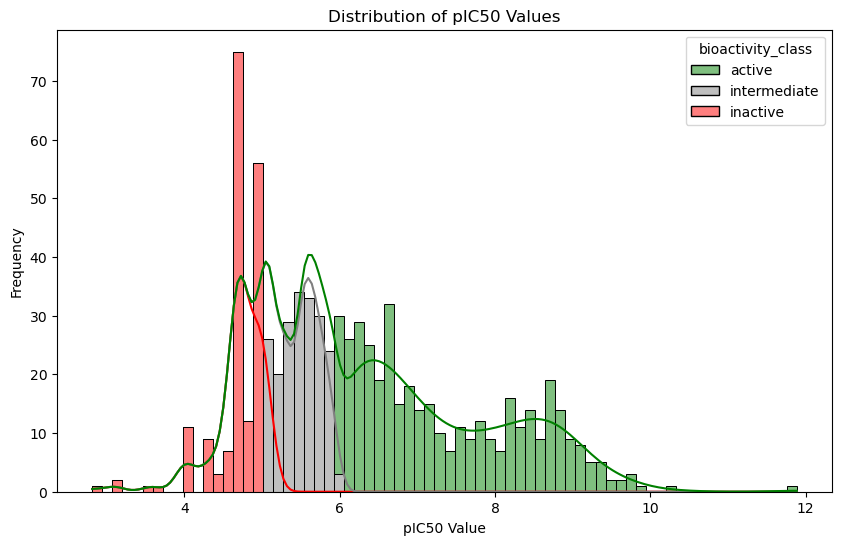

In [50]:
# let's now see the histogram of the pIC50 values.

plt.figure(figsize=(10, 6))
sns.histplot(data = lipinski_df, x = 'pIC50', bins=70, kde=True, color='skyblue', 
             hue = lipinski_df.bioactivity_class, palette = {'active':'green', 'intermediate':'grey', 'inactive':'red'}, multiple='stack'
             )
plt.xlabel('pIC50 Value')
plt.ylabel('Frequency')
plt.title('Distribution of pIC50 Values')
plt.show()

# it is like a mirror of the previous histogram of the IC50 values in terms of distribution

In [51]:
lipinski_df.rename(columns = {'Molecular Weight' : 'molecular_weight',
                              'Number of H Donors' : 'NumHDonors',
                              'Number of H Acceptors' : 'NumHAcceptors'}, 
                  inplace = True)

# lipinski_df = lipinski_df.drop(['standard_type', 'standard_value', 'standard_units'], axis = 1)

In [52]:
lipinski_df

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id,molecular_weight,LogP,NumHDonors,NumHAcceptors,bioactivity_class,pIC50
0,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,2.653213,nM,CHEMBL433252,461.631,6.08950,1,4,active,6.346787
1,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,3.875061,nM,CHEMBL54750,460.643,6.69450,1,3,intermediate,5.124939
2,CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21,IC50,3.812913,nM,CHEMBL56594,415.559,4.48200,1,3,intermediate,5.187087
3,CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...,IC50,2.000000,nM,CHEMBL52407,454.596,5.46760,1,6,active,7.000000
4,CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1,IC50,2.380211,nM,CHEMBL56449,435.593,5.69940,1,4,active,6.619789
...,...,...,...,...,...,...,...,...,...,...,...
777,COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...,IC50,4.000000,nM,CHEMBL5089005,523.033,5.64354,1,7,inactive,5.000000
778,CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...,IC50,4.000000,nM,CHEMBL5410211,426.908,-0.63066,2,6,inactive,5.000000
779,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,4.499687,nM,CHEMBL2017291,415.453,4.16254,1,7,inactive,4.500313
780,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,4.477121,nM,CHEMBL3643413,450.465,2.88450,1,7,inactive,4.522879


In [53]:
lipinski_df.dtypes # get rid of object data types later on

canonical_smiles       object
standard_type          object
standard_value        float64
standard_units         object
molecule_chembl_id     object
molecular_weight      float64
LogP                  float64
NumHDonors              int64
NumHAcceptors           int64
bioactivity_class      object
pIC50                 float64
dtype: object

In [54]:
# let's calculate the mordred descriptors for these compounds, having first dropped the rows with dtype == 'object'

lipinski_df.canonical_smiles

0      O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...
1      O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...
2       CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21
3      CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...
4      CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1
                             ...                        
777    COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...
778    CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...
779    COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...
780    CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...
781    CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...
Name: canonical_smiles, Length: 782, dtype: object

In [55]:
# Keep only rows where canonical_smiles is a string
lipinski_df = lipinski_df[lipinski_df['canonical_smiles'].apply(lambda x: isinstance(x, str))]

print(f"Filtered DataFrame shape: {lipinski_df.shape}")

Filtered DataFrame shape: (782, 11)


In [56]:
lipinski_df.canonical_smiles

0      O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...
1      O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...
2       CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21
3      CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...
4      CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1
                             ...                        
777    COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...
778    CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...
779    COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...
780    CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...
781    CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...
Name: canonical_smiles, Length: 782, dtype: object

In [57]:
from mordred import Calculator, descriptors

In [58]:
mol_list = []
for smile in lipinski_df.canonical_smiles:
    mol = Chem.MolFromSmiles(smile)
    mol_list.append(mol)

In [59]:
# generate the Calculator 
calc = Calculator(descriptors, ignore_3D = True)

# calculate the descriptors
mordred_list = []
mordred_desc = calc.pandas(mol_list)

100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [01:47<00:00,  7.26it/s]


In [60]:
mordred_desc

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,43.545257,2.488159,4.901876,43.545257,1.319553,4.441632,...,10.405928,84.901677,461.213698,7.206464,3706,49,178.0,209.0,8.451389,7.125000
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,43.545257,2.488159,4.901876,43.545257,1.319553,4.441632,...,10.405928,84.901677,460.218449,7.080284,3706,49,178.0,209.0,8.451389,7.125000
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,36.950614,2.482439,4.891852,36.950614,1.274159,4.283242,...,10.224592,78.338258,415.192963,7.158499,2563,44,148.0,172.0,9.840278,6.486111
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,41.470969,2.49307,4.899421,41.470969,1.295968,4.393357,...,10.298936,83.669067,454.203862,7.325869,3583,46,166.0,193.0,9.090278,7.125000
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,40.481276,2.486546,4.899069,40.481276,1.305848,4.363697,...,10.318870,80.797996,435.198048,7.253301,3197,47,162.0,189.0,8.840278,6.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,10.397238,86.957063,522.203383,7.679462,3600004937,55,186.0,216.0,divide by zero encountered in power (mZagreb1),7.972222
778,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,10.265175,81.541134,426.157102,8.040700,2900002658,45,154.0,183.0,divide by zero encountered in power (mZagreb1),6.416667
779,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,41.043613,2.568869,5.061988,41.043613,1.323988,4.392656,...,10.589887,83.695075,415.164440,7.983932,2502,57,174.0,215.0,9.694444,6.722222
780,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,41.207244,2.462397,4.920606,41.207244,1.287726,4.400403,...,10.467977,81.874342,450.199109,7.898230,3086,53,172.0,204.0,10.923611,6.972222


In [61]:
mordred_desc = mordred_desc.drop(["ABC", "ABCGG"], axis = 1)
mordred_desc

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,43.545257,2.488159,4.901876,43.545257,1.319553,4.441632,4.397243,0.13325,...,10.405928,84.901677,461.213698,7.206464,3706,49,178.0,209.0,8.451389,7.125000
1,0,0,43.545257,2.488159,4.901876,43.545257,1.319553,4.441632,4.397243,0.13325,...,10.405928,84.901677,460.218449,7.080284,3706,49,178.0,209.0,8.451389,7.125000
2,0,0,36.950614,2.482439,4.891852,36.950614,1.274159,4.283242,4.218514,0.145466,...,10.224592,78.338258,415.192963,7.158499,2563,44,148.0,172.0,9.840278,6.486111
3,0,0,41.470969,2.49307,4.899421,41.470969,1.295968,4.393357,4.35043,0.135951,...,10.298936,83.669067,454.203862,7.325869,3583,46,166.0,193.0,9.090278,7.125000
4,0,0,40.481276,2.486546,4.899069,40.481276,1.305848,4.363697,4.348556,0.140276,...,10.318870,80.797996,435.198048,7.253301,3197,47,162.0,189.0,8.840278,6.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),multiple fragments (VE1_A/VE1),multiple fragments (VE2_A/VE2),...,10.397238,86.957063,522.203383,7.679462,3600004937,55,186.0,216.0,divide by zero encountered in power (mZagreb1),7.972222
778,1,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),multiple fragments (VE1_A/VE1),multiple fragments (VE2_A/VE2),...,10.265175,81.541134,426.157102,8.040700,2900002658,45,154.0,183.0,divide by zero encountered in power (mZagreb1),6.416667
779,0,0,41.043613,2.568869,5.061988,41.043613,1.323988,4.392656,4.698879,0.151577,...,10.589887,83.695075,415.164440,7.983932,2502,57,174.0,215.0,9.694444,6.722222
780,0,0,41.207244,2.462397,4.920606,41.207244,1.287726,4.400403,4.928779,0.154024,...,10.467977,81.874342,450.199109,7.898230,3086,53,172.0,204.0,10.923611,6.972222


In [62]:
mordred_desc.dtypes

nAcid         int64
nBase         int64
SpAbs_A      object
SpMax_A      object
SpDiam_A     object
             ...   
WPol          int64
Zagreb1     float64
Zagreb2     float64
mZagreb1     object
mZagreb2    float64
Length: 1611, dtype: object

In [63]:
mordred_desc # one solution is to convert the non-numerical values to NAs first, then fill the gap with the mean value of its column.

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,43.545257,2.488159,4.901876,43.545257,1.319553,4.441632,4.397243,0.13325,...,10.405928,84.901677,461.213698,7.206464,3706,49,178.0,209.0,8.451389,7.125000
1,0,0,43.545257,2.488159,4.901876,43.545257,1.319553,4.441632,4.397243,0.13325,...,10.405928,84.901677,460.218449,7.080284,3706,49,178.0,209.0,8.451389,7.125000
2,0,0,36.950614,2.482439,4.891852,36.950614,1.274159,4.283242,4.218514,0.145466,...,10.224592,78.338258,415.192963,7.158499,2563,44,148.0,172.0,9.840278,6.486111
3,0,0,41.470969,2.49307,4.899421,41.470969,1.295968,4.393357,4.35043,0.135951,...,10.298936,83.669067,454.203862,7.325869,3583,46,166.0,193.0,9.090278,7.125000
4,0,0,40.481276,2.486546,4.899069,40.481276,1.305848,4.363697,4.348556,0.140276,...,10.318870,80.797996,435.198048,7.253301,3197,47,162.0,189.0,8.840278,6.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),multiple fragments (VE1_A/VE1),multiple fragments (VE2_A/VE2),...,10.397238,86.957063,522.203383,7.679462,3600004937,55,186.0,216.0,divide by zero encountered in power (mZagreb1),7.972222
778,1,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),multiple fragments (VE1_A/VE1),multiple fragments (VE2_A/VE2),...,10.265175,81.541134,426.157102,8.040700,2900002658,45,154.0,183.0,divide by zero encountered in power (mZagreb1),6.416667
779,0,0,41.043613,2.568869,5.061988,41.043613,1.323988,4.392656,4.698879,0.151577,...,10.589887,83.695075,415.164440,7.983932,2502,57,174.0,215.0,9.694444,6.722222
780,0,0,41.207244,2.462397,4.920606,41.207244,1.287726,4.400403,4.928779,0.154024,...,10.467977,81.874342,450.199109,7.898230,3086,53,172.0,204.0,10.923611,6.972222


In [64]:
# Convert all columns to numeric (non-convertible values become NaN)
mordred_desc = mordred_desc.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean of each column
mordred_desc = mordred_desc.fillna(mordred_desc.mean(numeric_only=True))

print("Cleaned DataFrame shape:", mordred_desc.shape)


Cleaned DataFrame shape: (782, 1611)


In [65]:
mordred_desc

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,43.545257,2.488159,4.901876,43.545257,1.319553,4.441632,4.397243,0.133250,...,10.405928,84.901677,461.213698,7.206464,3706,49,178.0,209.0,8.451389,7.125000
1,0,0,43.545257,2.488159,4.901876,43.545257,1.319553,4.441632,4.397243,0.133250,...,10.405928,84.901677,460.218449,7.080284,3706,49,178.0,209.0,8.451389,7.125000
2,0,0,36.950614,2.482439,4.891852,36.950614,1.274159,4.283242,4.218514,0.145466,...,10.224592,78.338258,415.192963,7.158499,2563,44,148.0,172.0,9.840278,6.486111
3,0,0,41.470969,2.493070,4.899421,41.470969,1.295968,4.393357,4.350430,0.135951,...,10.298936,83.669067,454.203862,7.325869,3583,46,166.0,193.0,9.090278,7.125000
4,0,0,40.481276,2.486546,4.899069,40.481276,1.305848,4.363697,4.348556,0.140276,...,10.318870,80.797996,435.198048,7.253301,3197,47,162.0,189.0,8.840278,6.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0,1,45.445757,2.407934,4.774391,45.445757,1.288681,4.444969,4.323473,0.129066,...,10.397238,86.957063,522.203383,7.679462,3600004937,55,186.0,216.0,10.871337,7.972222
778,1,1,45.445757,2.407934,4.774391,45.445757,1.288681,4.444969,4.323473,0.129066,...,10.265175,81.541134,426.157102,8.040700,2900002658,45,154.0,183.0,10.871337,6.416667
779,0,0,41.043613,2.568869,5.061988,41.043613,1.323988,4.392656,4.698879,0.151577,...,10.589887,83.695075,415.164440,7.983932,2502,57,174.0,215.0,9.694444,6.722222
780,0,0,41.207244,2.462397,4.920606,41.207244,1.287726,4.400403,4.928779,0.154024,...,10.467977,81.874342,450.199109,7.898230,3086,53,172.0,204.0,10.923611,6.972222


In [66]:
# another set of important descriptors are the MACCSkeys (a set of 166 structural patterns).
from rdkit.Chem import MACCSkeys, PandasTools

maccs_list = []
for obj in mol_list:
    maccs_obj_list = MACCSkeys.GenMACCSKeys(obj)
    maccs_list.append(maccs_obj_list)

maccs_list

In [67]:
# Conversion: ExplicitBitVector -> Numpy Array

maccs_np_list = []
for bitvect in maccs_list:
    arr = np.array(bitvect)
    maccs_np_list.append(arr)

maccs_np_list

maccs_np_array = np.vstack(maccs_np_list)
maccs_np_array

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]], shape=(782, 167))

In [68]:
# Conversion: Numpy Array -> Pandas DataFrame

row_names = [i for i in range(maccs_np_array.shape[0])]
column_names = [f"MACCSkey_{i}" for i in range(maccs_np_array.shape[1])]

maccs_df = pd.DataFrame(maccs_np_array, columns = column_names, index = row_names)
maccs_df

,MACCSkey_0,MACCSkey_1,MACCSkey_2,MACCSkey_3,MACCSkey_4,MACCSkey_5,MACCSkey_6,MACCSkey_7,MACCSkey_8,MACCSkey_9,...,MACCSkey_157,MACCSkey_158,MACCSkey_159,MACCSkey_160,MACCSkey_161,MACCSkey_162,MACCSkey_163,MACCSkey_164,MACCSkey_165,MACCSkey_166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
778,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
779,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
780,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [69]:
maccs_df.dtypes

MACCSkey_0      int64
MACCSkey_1      int64
MACCSkey_2      int64
MACCSkey_3      int64
MACCSkey_4      int64
                ...  
MACCSkey_162    int64
MACCSkey_163    int64
MACCSkey_164    int64
MACCSkey_165    int64
MACCSkey_166    int64
Length: 167, dtype: object

In [70]:
# Drop columns that contain any non-numeric data
maccs_df_numeric = maccs_df.apply(pd.to_numeric, errors='coerce')  # Convert everything to numeric (non-numeric becomes NaN)
non_numeric_cols = maccs_df_numeric.columns[maccs_df_numeric.isna().any()].tolist()  # Identify columns with NaNs (i.e., had non-numeric)

# Drop those columns
maccs_df_cleaned = maccs_df_numeric.drop(columns=non_numeric_cols)

print(f"Dropped columns: {non_numeric_cols}")
print(f"Shape after dropping: {maccs_df_cleaned.shape}")


Dropped columns: []
Shape after dropping: (782, 167)


In [71]:
# so it's the same

del maccs_df_cleaned # not needed

In [72]:
# merge the three different set of descriptors 

merged_df = pd.concat([lipinski_df.drop(["bioactivity_class", "pIC50"], axis = 1), 
                       maccs_df, mordred_desc, lipinski_df.bioactivity_class, lipinski_df.pIC50], axis = 1)
merged_df

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id,molecular_weight,LogP,NumHDonors,NumHAcceptors,MACCSkey_0,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,bioactivity_class,pIC50
0,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,2.653213,nM,CHEMBL433252,461.631,6.08950,1,4,0,...,461.213698,7.206464,3706,49,178.0,209.0,8.451389,7.125000,active,6.346787
1,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,3.875061,nM,CHEMBL54750,460.643,6.69450,1,3,0,...,460.218449,7.080284,3706,49,178.0,209.0,8.451389,7.125000,intermediate,5.124939
2,CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21,IC50,3.812913,nM,CHEMBL56594,415.559,4.48200,1,3,0,...,415.192963,7.158499,2563,44,148.0,172.0,9.840278,6.486111,intermediate,5.187087
3,CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...,IC50,2.000000,nM,CHEMBL52407,454.596,5.46760,1,6,0,...,454.203862,7.325869,3583,46,166.0,193.0,9.090278,7.125000,active,7.000000
4,CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1,IC50,2.380211,nM,CHEMBL56449,435.593,5.69940,1,4,0,...,435.198048,7.253301,3197,47,162.0,189.0,8.840278,6.875000,active,6.619789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...,IC50,4.000000,nM,CHEMBL5089005,523.033,5.64354,1,7,0,...,522.203383,7.679462,3600004937,55,186.0,216.0,10.871337,7.972222,inactive,5.000000
778,CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...,IC50,4.000000,nM,CHEMBL5410211,426.908,-0.63066,2,6,0,...,426.157102,8.040700,2900002658,45,154.0,183.0,10.871337,6.416667,inactive,5.000000
779,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,4.499687,nM,CHEMBL2017291,415.453,4.16254,1,7,0,...,415.164440,7.983932,2502,57,174.0,215.0,9.694444,6.722222,inactive,4.500313
780,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,4.477121,nM,CHEMBL3643413,450.465,2.88450,1,7,0,...,450.199109,7.898230,3086,53,172.0,204.0,10.923611,6.972222,inactive,4.522879


In [73]:
''' -------------------------------------------- Data Visualization -------------------------------------------- '''

' -------------------------------------------- Data Visualization -------------------------------------------- '

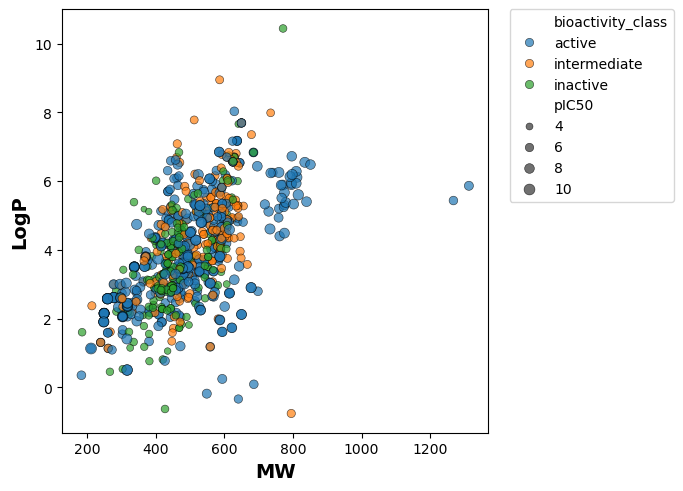

In [74]:
### let's now do a scatter plot of the MW vs solubility (logP) of the molecules using seaborn ###
### similar vs different chemical spaces ###

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x = "molecular_weight", y = "LogP", data = merged_df, hue = "bioactivity_class", size = "pIC50", edgecolor = "black", alpha = 0.7)

plt.xlabel("MW", fontsize = 14, fontweight = "bold")
plt.ylabel("LogP", fontsize = 14, fontweight = "bold")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

These are the SMILES sequences of the outliers:
 ['CC(C)NCC(O)COc1ccccc1CCCSCC(=O)NCCOCCOCCNC(=O)CCCCCC1(C)C(/C=C/C=C/C=C2/N(CCCS(=O)(=O)O)c3ccc(S(=O)(=O)O)cc3C2(C)C)=[N+](CCCS(=O)(=O)[O-])c2ccc(S(=O)(=O)O)cc21', 'C=CCc1ccccc1OCC(O)CNCCOCCOCCOCCOCCNC(=O)CCCCCC1(C)C(/C=C/C=C/C=C2/N(CCCS(=O)(=O)O)c3ccc(S(=O)(=O)O)cc3C2(C)C)=[N+](CCCS(=O)(=O)[O-])c2ccc(S(=O)(=O)O)cc21']
These are the mol objects of the outliers:
 [<rdkit.Chem.rdchem.Mol object at 0x00000196218200B0>, <rdkit.Chem.rdchem.Mol object at 0x00000196218235A0>]


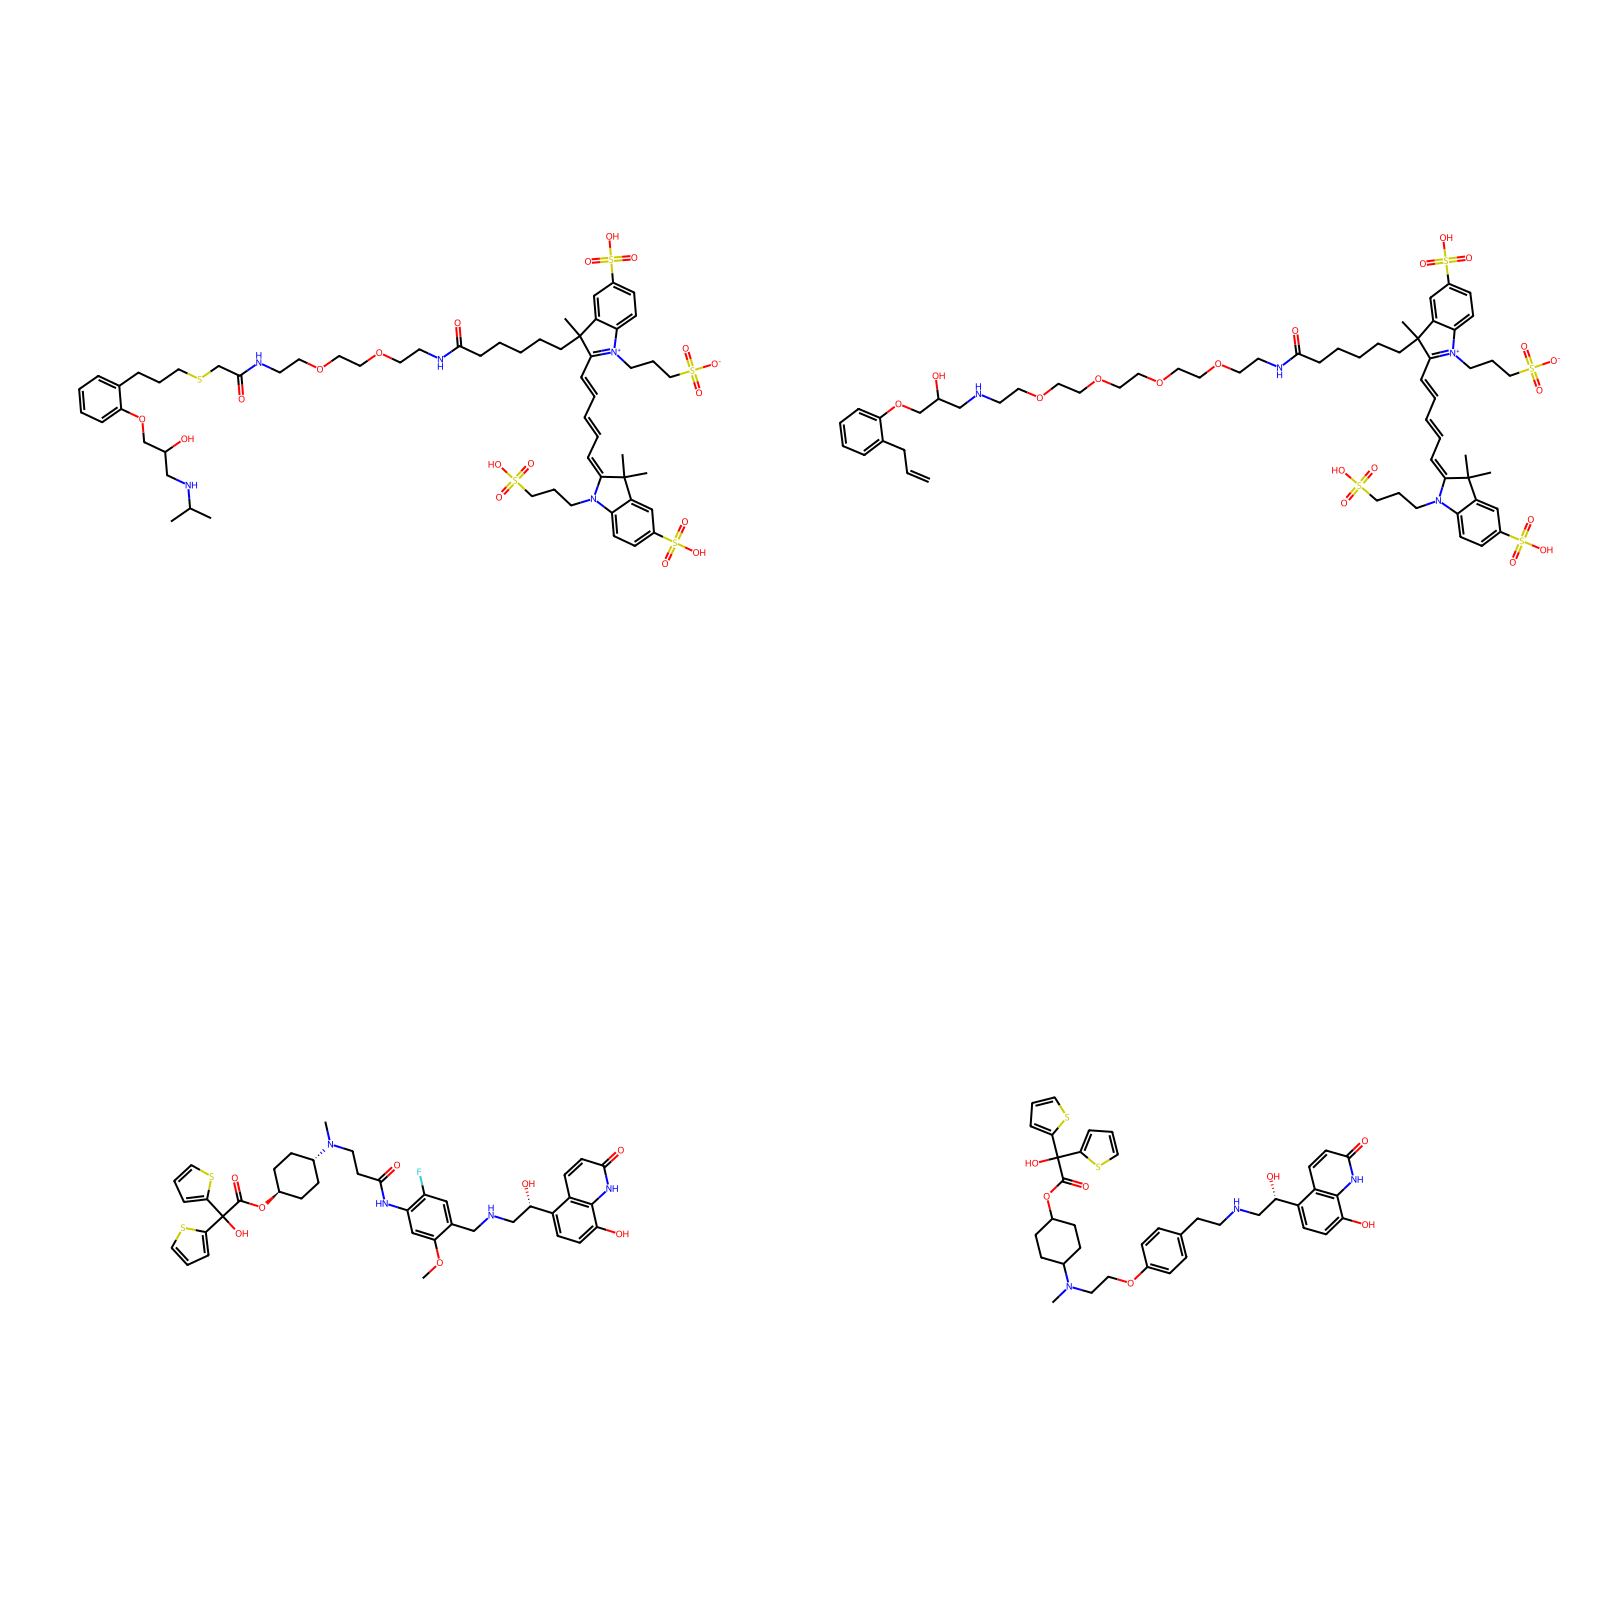

In [75]:
### let's see the outliers ###

merged_df[merged_df.molecular_weight > 1200]["canonical_smiles"]
outliers_smiles = []

for x in merged_df[merged_df.molecular_weight > 1200]["canonical_smiles"]:
    outliers_smiles.append(x)
print(f"These are the SMILES sequences of the outliers:\n {outliers_smiles}")

mol_object_of_outliers = []
for x in outliers_smiles:
    mol = Chem.MolFromSmiles(x)
    mol_object_of_outliers.append(mol)
print(f"These are the mol objects of the outliers:\n {mol_object_of_outliers}")

img = Draw.MolsToGridImage(mol_object_of_outliers, molsPerRow = 2, subImgSize = (800, 800))
img

### let's see the difference between another pair of molecules with same LogP but smaller MW ###

other_pair_of_molecules = merged_df[(merged_df.molecular_weight>700) & 
                                    (merged_df.molecular_weight<800) & 
                                    (merged_df.LogP>5) & 
                                    (merged_df.LogP<6)].sample(2)
other_pair_of_molecules

smiles = []
for x in other_pair_of_molecules.canonical_smiles:
    smiles.append(x)

mol_object_of_other_pair = []
for y in smiles:
    mol = Chem.MolFromSmiles(y)
    mol_object_of_other_pair.append(mol)

objects = mol_object_of_outliers + mol_object_of_other_pair
second_img = Draw.MolsToGridImage(objects, molsPerRow = 2, subImgSize = (800, 800))
second_img

### συμπεράσματα ###

C:\Users\panos\AppData\Local\Temp\ipykernel_10956\915225643.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "bioactivity_class", y = "pIC50", data = merged_df, palette = {"inactive" : "darkred",


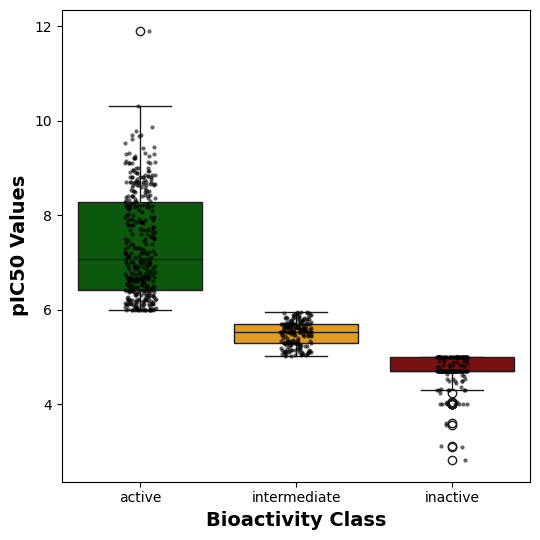

In [76]:
### let's make a boxplot of the pIC50 values ###

plt.figure(figsize = (5.5, 5.5))
# here we import seaborn as sns 
sns.boxplot(x = "bioactivity_class", y = "pIC50", data = merged_df, palette = {"inactive" : "darkred", 
                                                                               "active" : "darkgreen", 
                                                                               "intermediate" : "orange"})
sns.stripplot(
    x = "bioactivity_class",
    y = "pIC50",
    data = merged_df,
    color = 'black',
    size = 3,
    jitter = True,
    alpha = 0.6)
plt.xlabel("Bioactivity Class", fontsize = 14, fontweight = "bold")
plt.ylabel("pIC50 Values", fontsize = 14, fontweight = "bold")
plt.tight_layout()

### explanation: the active molecules have a high pIC50 value which means that -> since: pIC50 = - log10(IC50*10^-9) -> 
### pIC50 increase <-> IC50 decreases -> higher concentration of the molecule is needed to induce inhibition to half of the receptor. 

In [77]:
# for this we need to install the scipy package
# %pip install scipy

In [78]:
# Statistical Analysis - Mann Whitney U Test
def mannwhitney(descriptor, verbose = False):
    
    from numpy.random import seed, randn
    from scipy.stats import mannwhitneyu

    # seed the random number generator
    seed(1)

    # actives and inactives
    selection = [descriptor, "bioactivity_class"]
    selection_df = merged_df[selection]
    active = selection_df[selection_df.bioactivity_class == 'active']
    active = active[descriptor]

    selection = [descriptor, "bioactivity_class"]
    selection_df = merged_df[selection]
    inactive = selection_df[selection_df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]

    # compare samples 
    stat, p = mannwhitneyu(active, inactive)
    print("Statistics = %.3f, p = %.3f" % (stat, p))

    # interpret 
    alpha = 0.05
    if p > alpha:
        interpretation = "Same Distribution (fail to reject H0)" # the null hypothesis
    else:
        interpretation = "Different Distribution (reject H0)"

    results = pd.DataFrame({
        "Descriptor" : descriptor,
        "Statistics" : stat, 
        "p" : p,
        "alpha" : alpha,
        "Interpretation" : interpretation}, index = [0])

    filename = "mannwhitneyu2_" + descriptor + ".csv"
    results.to_csv(filename)

    return results

### we only do pairwise comparison, so only the actives and inactives that interests us most.

In [79]:
mannwhitney("pIC50")

### explanation: we reject the null hypothesis which states that there is no statistical significance between the pIC50 values
### of the active and inactive molecules

Statistics = 72090.000, p = 0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,72090.0,1.015272e-82,0.05,Different Distribution (reject H0)


In [80]:
# we do the same with every descriptor available: pIC50, MW, LogP, NumHDonors, NumHAcceptors !!!

In [81]:
mannwhitney("molecular_weight")

Statistics = 42741.000, p = 0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,molecular_weight,42741.0,0.000351,0.05,Different Distribution (reject H0)


C:\Users\panos\AppData\Local\Temp\ipykernel_10956\2509026747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "bioactivity_class", y = "molecular_weight", data = merged_df, palette = {"inactive" : "darkred",


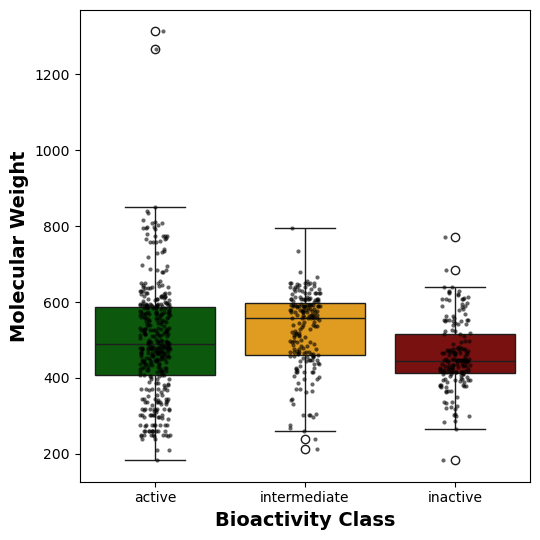

In [82]:
plt.figure(figsize = (5.5, 5.5))
# here we import seaborn as sns 
sns.boxplot(x = "bioactivity_class", y = "molecular_weight", data = merged_df, palette = {"inactive" : "darkred", 
                                                                                          "active" : "darkgreen", 
                                                                                          "intermediate" : "orange"})
sns.stripplot(
    x = "bioactivity_class",
    y = "molecular_weight",
    data = merged_df,
    color = 'black',
    size = 3,
    jitter = True,
    alpha = 0.6)
plt.xlabel("Bioactivity Class", fontsize = 14, fontweight = "bold")
plt.ylabel("Molecular Weight", fontsize = 14, fontweight = "bold")
plt.tight_layout()

In [83]:
mannwhitney("LogP")

Statistics = 39548.500, p = 0.061


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,39548.5,0.061455,0.05,Same Distribution (fail to reject H0)


C:\Users\panos\AppData\Local\Temp\ipykernel_10956\3430242154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "bioactivity_class", y = "LogP", data = merged_df, palette = {"inactive" : "darkred",


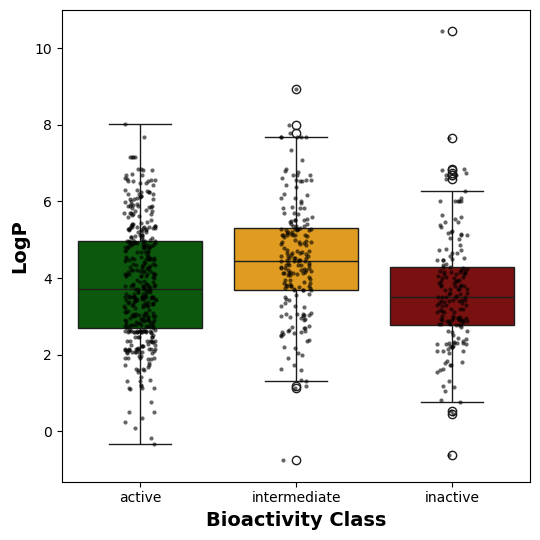

In [84]:
plt.figure(figsize = (5.5, 5.5))
# here we import seaborn as sns 
sns.boxplot(x = "bioactivity_class", y = "LogP", data = merged_df, palette = {"inactive" : "darkred", 
                                                                                          "active" : "darkgreen", 
                                                                                          "intermediate" : "orange"})
sns.stripplot(
    x = "bioactivity_class",
    y = "LogP",
    data = merged_df,
    color = 'black',
    size = 3,
    jitter = True,
    alpha = 0.6)
plt.xlabel("Bioactivity Class", fontsize = 14, fontweight = "bold")
plt.ylabel("LogP", fontsize = 14, fontweight = "bold")
plt.tight_layout()

In [85]:
mannwhitney("NumHDonors")

Statistics = 48875.000, p = 0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,48875.0,2.300580e-12,0.05,Different Distribution (reject H0)


C:\Users\panos\AppData\Local\Temp\ipykernel_10956\2587231101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "bioactivity_class", y = "NumHDonors", data = merged_df, palette = {"inactive" : "darkred",


Text(0, 0.5, 'NumHDonors')

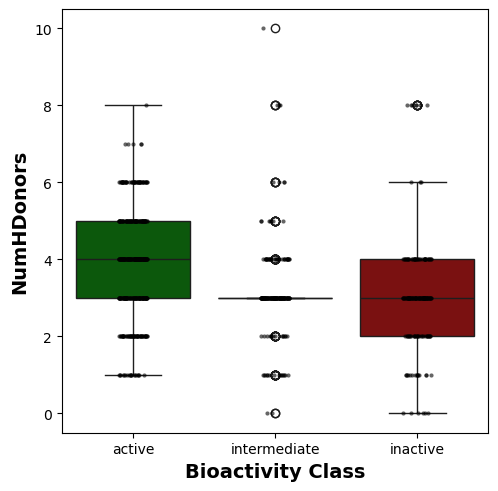

In [86]:
plt.figure(figsize = (5.5, 5.5))
# here we import seaborn as sns 
sns.boxplot(x = "bioactivity_class", y = "NumHDonors", data = merged_df, palette = {"inactive" : "darkred", 
                                                                                          "active" : "darkgreen", 
                                                                                          "intermediate" : "orange"})
sns.stripplot(
    x = "bioactivity_class",
    y = "NumHDonors",
    data = merged_df,
    color = 'black',
    size = 3,
    jitter = True,
    alpha = 0.6)
plt.xlabel("Bioactivity Class", fontsize = 14, fontweight = "bold")
plt.ylabel("NumHDonors", fontsize = 14, fontweight = "bold")

In [87]:
mannwhitney("NumHAcceptors")

Statistics = 37363.000, p = 0.476


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,37363.0,0.475572,0.05,Same Distribution (fail to reject H0)


C:\Users\panos\AppData\Local\Temp\ipykernel_10956\4255294820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "bioactivity_class", y = "NumHAcceptors", data = merged_df, palette = {"inactive" : "darkred",


Text(0, 0.5, 'NumHAcceptors')

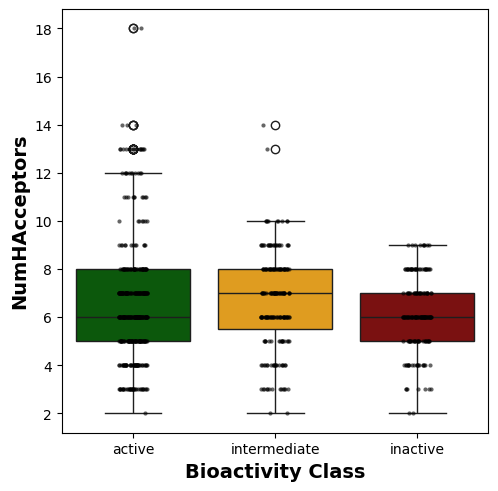

In [88]:
plt.figure(figsize = (5.5, 5.5))
# here we import seaborn as sns 
sns.boxplot(x = "bioactivity_class", y = "NumHAcceptors", data = merged_df, palette = {"inactive" : "darkred", 
                                                                                          "active" : "darkgreen", 
                                                                                          "intermediate" : "orange"})
sns.stripplot(
    x = "bioactivity_class",
    y = "NumHAcceptors",
    data = merged_df,
    color = 'black',
    size = 3,
    jitter = True,
    alpha = 0.6)
plt.xlabel("Bioactivity Class", fontsize = 14, fontweight = "bold")
plt.ylabel("NumHAcceptors", fontsize = 14, fontweight = "bold")

In [89]:
# the findings suggest that LogP and NumHAccpetors (2 important Lipinski Descriptors) may not be key factors
# at least not in isolation - maybe they are biologically significant when combined with other data

In [90]:
''' ---------------------------------------------- Random Forest Classifier ---------------------------------------------- '''

' ---------------------------------------------- Random Forest Classifier ---------------------------------------------- '

In [91]:
# check for boolean values

bool_columns = []

for col in merged_df.columns:
    if merged_df[col].apply(lambda x: isinstance(x, bool)).any():
        bool_columns.append(col)

print("Columns with boolean values:", bool_columns)

Columns with boolean values: ['Lipinski', 'GhoseFilter']


In [92]:
merged_df = merged_df.drop(["Lipinski", "GhoseFilter"], axis = 1)

In [93]:
# check again for NAs

na_columns = [col for col in merged_df.columns if merged_df[col].isna().any()]
print("Columns with at least one NaN:", na_columns)

Columns with at least one NaN: ['SpAbs_Dt', 'SpMax_Dt', 'SpDiam_Dt', 'SpAD_Dt', 'SpMAD_Dt', 'LogEE_Dt', 'SM1_Dt', 'VE1_Dt', 'VE2_Dt', 'VE3_Dt', 'VR1_Dt', 'VR2_Dt', 'VR3_Dt', 'DetourIndex', 'MAXsLi', 'MAXssBe', 'MAXssssBe', 'MAXssBH', 'MAXssssB', 'MAXtCH', 'MAXddC', 'MAXsNH3', 'MAXssNH2', 'MAXdNH', 'MAXsssNH', 'MAXssssN', 'MAXsSiH3', 'MAXssSiH2', 'MAXsssSiH', 'MAXssssSi', 'MAXsPH2', 'MAXssPH', 'MAXsssP', 'MAXdsssP', 'MAXsssssP', 'MAXdssS', 'MAXsGeH3', 'MAXssGeH2', 'MAXsssGeH', 'MAXssssGe', 'MAXsAsH2', 'MAXssAsH', 'MAXsssAs', 'MAXsssdAs', 'MAXsssssAs', 'MAXsSeH', 'MAXdSe', 'MAXssSe', 'MAXaaSe', 'MAXdssSe', 'MAXddssSe', 'MAXsSnH3', 'MAXssSnH2', 'MAXsssSnH', 'MAXssssSn', 'MAXsPbH3', 'MAXssPbH2', 'MAXsssPbH', 'MAXssssPb', 'MINsLi', 'MINssBe', 'MINssssBe', 'MINssBH', 'MINssssB', 'MINtCH', 'MINddC', 'MINsNH3', 'MINssNH2', 'MINdNH', 'MINsssNH', 'MINssssN', 'MINsSiH3', 'MINssSiH2', 'MINsssSiH', 'MINssssSi', 'MINsPH2', 'MINssPH', 'MINsssP', 'MINdsssP', 'MINsssssP', 'MINdssS', 'MINsGeH3', 'MINssG

In [95]:
non_numeric_cols = []

for col in merged_df.columns:
    # Try to convert to numeric, forcing errors to NaN
    converted = pd.to_numeric(merged_df[col], errors='coerce')
    # Check if any values were converted to NaN (meaning non-numeric original values)
    if converted.isna().any() and merged_df[col].notna().any():
        non_numeric_cols.append(col)

print("Columns with non-numeric data:", non_numeric_cols)
print(len(non_numeric_cols))

Columns with non-numeric data: ['canonical_smiles', 'standard_type', 'standard_units', 'molecule_chembl_id', 'bioactivity_class']
5


In [100]:
merged_df

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id,molecular_weight,LogP,NumHDonors,NumHAcceptors,MACCSkey_0,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,bioactivity_class,pIC50
0,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,2.653213,nM,CHEMBL433252,461.631,6.08950,1,4,0,...,461.213698,7.206464,3706,49,178.0,209.0,8.451389,7.125000,active,6.346787
1,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,3.875061,nM,CHEMBL54750,460.643,6.69450,1,3,0,...,460.218449,7.080284,3706,49,178.0,209.0,8.451389,7.125000,intermediate,5.124939
2,CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21,IC50,3.812913,nM,CHEMBL56594,415.559,4.48200,1,3,0,...,415.192963,7.158499,2563,44,148.0,172.0,9.840278,6.486111,intermediate,5.187087
3,CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...,IC50,2.000000,nM,CHEMBL52407,454.596,5.46760,1,6,0,...,454.203862,7.325869,3583,46,166.0,193.0,9.090278,7.125000,active,7.000000
4,CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1,IC50,2.380211,nM,CHEMBL56449,435.593,5.69940,1,4,0,...,435.198048,7.253301,3197,47,162.0,189.0,8.840278,6.875000,active,6.619789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...,IC50,4.000000,nM,CHEMBL5089005,523.033,5.64354,1,7,0,...,522.203383,7.679462,3600004937,55,186.0,216.0,10.871337,7.972222,inactive,5.000000
778,CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...,IC50,4.000000,nM,CHEMBL5410211,426.908,-0.63066,2,6,0,...,426.157102,8.040700,2900002658,45,154.0,183.0,10.871337,6.416667,inactive,5.000000
779,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,4.499687,nM,CHEMBL2017291,415.453,4.16254,1,7,0,...,415.164440,7.983932,2502,57,174.0,215.0,9.694444,6.722222,inactive,4.500313
780,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,4.477121,nM,CHEMBL3643413,450.465,2.88450,1,7,0,...,450.199109,7.898230,3086,53,172.0,204.0,10.923611,6.972222,inactive,4.522879


In [104]:
# merged_df = merged_df.drop(columns = na_columns, inplace = True)
# merged_df

In [105]:
merged_df

,canonical_smiles,standard_type,standard_value,standard_units,molecule_chembl_id,molecular_weight,LogP,NumHDonors,NumHAcceptors,MACCSkey_0,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,bioactivity_class,pIC50
0,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,2.653213,nM,CHEMBL433252,461.631,6.08950,1,4,0,...,461.213698,7.206464,3706,49,178.0,209.0,8.451389,7.125000,active,6.346787
1,O=S(=O)(Nc1ccccc1)c1ccc2c(c1)CCN2c1cccc(CCCC2C...,IC50,3.875061,nM,CHEMBL54750,460.643,6.69450,1,3,0,...,460.218449,7.080284,3706,49,178.0,209.0,8.451389,7.125000,intermediate,5.124939
2,CCCCCCN(C)C(=O)N1CCc2cc(S(=O)(=O)Nc3ccccc3)ccc21,IC50,3.812913,nM,CHEMBL56594,415.559,4.48200,1,3,0,...,415.192963,7.158499,2563,44,148.0,172.0,9.840278,6.486111,intermediate,5.187087
3,CCCCCCCCc1nc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32...,IC50,2.000000,nM,CHEMBL52407,454.596,5.46760,1,6,0,...,454.203862,7.325869,3583,46,166.0,193.0,9.090278,7.125000,active,7.000000
4,CCCCCCc1ccc(N2CCc3cc(S(=O)(=O)Nc4ccccc4)ccc32)nc1,IC50,2.380211,nM,CHEMBL56449,435.593,5.69940,1,4,0,...,435.198048,7.253301,3197,47,162.0,189.0,8.840278,6.875000,active,6.619789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc...,IC50,4.000000,nM,CHEMBL5089005,523.033,5.64354,1,7,0,...,522.203383,7.679462,3600004937,55,186.0,216.0,10.871337,7.972222,inactive,5.000000
778,CNc1cc[n+](CCNC(=O)c2ccn3c(-c4c(C)noc4C)cnc3c2...,IC50,4.000000,nM,CHEMBL5410211,426.908,-0.63066,2,6,0,...,426.157102,8.040700,2900002658,45,154.0,183.0,10.871337,6.416667,inactive,5.000000
779,COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](...,IC50,4.499687,nM,CHEMBL2017291,415.453,4.16254,1,7,0,...,415.164440,7.983932,2502,57,174.0,215.0,9.694444,6.722222,inactive,4.500313
780,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,IC50,4.477121,nM,CHEMBL3643413,450.465,2.88450,1,7,0,...,450.199109,7.898230,3086,53,172.0,204.0,10.923611,6.972222,inactive,4.522879


In [106]:
# Total number of NaN values in the entire DataFrame
# print("Total NaNs:", merged_df_cleaned.isnull().sum().sum())

In [107]:
# we create a different data frame for each model we are gonna build
# in a random forest classifier it doesn't matter whether or not we have used a variance threshold or if we have standardized - normalized the data.
# RFCL stands for RandomForestClassifier

drop_cols = ['canonical_smiles', 'standard_type', 'standard_value', 'standard_units', 'molecule_chembl_id', 'pIC50']
RFCL_df = merged_df.drop(columns = drop_cols)
RFCL_df

,molecular_weight,LogP,NumHDonors,NumHAcceptors,MACCSkey_0,MACCSkey_1,MACCSkey_2,MACCSkey_3,MACCSkey_4,MACCSkey_5,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,bioactivity_class
0,461.631,6.08950,1,4,0,0,0,0,0,0,...,84.901677,461.213698,7.206464,3706,49,178.0,209.0,8.451389,7.125000,active
1,460.643,6.69450,1,3,0,0,0,0,0,0,...,84.901677,460.218449,7.080284,3706,49,178.0,209.0,8.451389,7.125000,intermediate
2,415.559,4.48200,1,3,0,0,0,0,0,0,...,78.338258,415.192963,7.158499,2563,44,148.0,172.0,9.840278,6.486111,intermediate
3,454.596,5.46760,1,6,0,0,0,0,0,0,...,83.669067,454.203862,7.325869,3583,46,166.0,193.0,9.090278,7.125000,active
4,435.593,5.69940,1,4,0,0,0,0,0,0,...,80.797996,435.198048,7.253301,3197,47,162.0,189.0,8.840278,6.875000,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,523.033,5.64354,1,7,0,0,0,0,0,0,...,86.957063,522.203383,7.679462,3600004937,55,186.0,216.0,10.871337,7.972222,inactive
778,426.908,-0.63066,2,6,0,0,0,0,0,0,...,81.541134,426.157102,8.040700,2900002658,45,154.0,183.0,10.871337,6.416667,inactive
779,415.453,4.16254,1,7,0,0,0,0,0,0,...,83.695075,415.164440,7.983932,2502,57,174.0,215.0,9.694444,6.722222,inactive
780,450.465,2.88450,1,7,0,0,0,0,0,0,...,81.874342,450.199109,7.898230,3086,53,172.0,204.0,10.923611,6.972222,inactive


In [108]:
# Check if any NaNs exist in the whole DataFrame
print(RFCL_df.isnull().values.any())


False


In [109]:
# Total number of NaN values in the entire DataFrame
print("Total NaNs:", RFCL_df.isnull().sum().sum())


Total NaNs: 0


In [110]:
''' --------------------------------------------- RandomForestClassifier --------------------------------------------- '''

' --------------------------------------------- RandomForestClassifier --------------------------------------------- '

In [111]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
X = RFCL_df.drop("bioactivity_class", axis = 1)

# Target variable
Y = RFCL_df['bioactivity_class']

# Step 2: Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(Y)  # Converts 'active', 'inactive', 'intermediate' to 0,1,2

# Step 3: Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify = y_encoded
)

# Step 4: Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Step 5: Predict and evaluate
Y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, Y_pred, target_names = le.classes_))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

      active       0.77      0.84      0.80        81
    inactive       0.71      0.61      0.66        36
intermediate       0.50      0.47      0.49        40

    accuracy                           0.69       157
   macro avg       0.66      0.64      0.65       157
weighted avg       0.69      0.69      0.69       157

Confusion Matrix:
 [[68  1 12]
 [ 7 22  7]
 [13  8 19]]


In [114]:
# Active: 80% F1-score — solid.
# Inactive: 66% F1-score — okay but could improve.
# Intermediate: 49% F1-score — harder to classify, might be more ambiguous.

In [115]:
RFCL_df.bioactivity_class.value_counts()

bioactivity_class
active          405
intermediate    199
inactive        178
Name: count, dtype: int64

In [116]:
# we could add some weight to the minority classes that are under-represented causing the model to under-perform

X = RFCL_df.drop("bioactivity_class", axis = 1)

# Target variable
Y = RFCL_df['bioactivity_class']

# Step 2: Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(Y)  # Converts 'active', 'inactive', 'intermediate' to 0,1,2

# Step 3: Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify = y_encoded
)

# Step 4: Train Random Forest classifier
clf = RandomForestClassifier(class_weight = 'balanced', random_state=42)
clf.fit(X_train, Y_train)

# Step 5: Predict and evaluate
Y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, Y_pred, target_names = le.classes_))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

      active       0.76      0.84      0.80        81
    inactive       0.69      0.61      0.65        36
intermediate       0.54      0.47      0.51        40

    accuracy                           0.69       157
   macro avg       0.66      0.64      0.65       157
weighted avg       0.69      0.69      0.69       157

Confusion Matrix:
 [[68  2 11]
 [ 9 22  5]
 [13  8 19]]


In [119]:
# small improvement
# we can also use SMOTE analysis

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Assume features and target:
X = RFCL_df.drop(columns=['bioactivity_class'])
y = RFCL_df['bioactivity_class']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # active, intermediate, inactive -> 0,1,2 (for example)

# Split before SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE, counts of classes in y_train:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After SMOTE, counts of classes in y_train_resampled:", dict(zip(*np.unique(y_train_resampled, return_counts=True))))

# Train Random Forest on balanced data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = clf.predict(X_test)

# Results
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Before SMOTE, counts of classes in y_train: {np.int64(0): np.int64(324), np.int64(1): np.int64(142), np.int64(2): np.int64(159)}
After SMOTE, counts of classes in y_train_resampled: {np.int64(0): np.int64(324), np.int64(1): np.int64(324), np.int64(2): np.int64(324)}
Classification Report:
               precision    recall  f1-score   support

      active       0.82      0.81      0.82        81
    inactive       0.71      0.61      0.66        36
intermediate       0.52      0.60      0.56        40

    accuracy                           0.71       157
   macro avg       0.69      0.68      0.68       157
weighted avg       0.72      0.71      0.72       157

Confusion Matrix:
 [[66  2 13]
 [ 5 22  9]
 [ 9  7 24]]


In [120]:
# Problem: 1) Need for future re-sampling
#          2) Dimensionality Problem: small number of molecules with a large set of descriptors
#             Dimensionality Reduction : set a VarianceThreshold, do PCA, drop specific columns

In [121]:
''' ---------------------------------------------- Dimensionality Reduction ---------------------------------------------- '''

' ---------------------------------------------- Dimensionality Reduction ---------------------------------------------- '

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [123]:
X

,molecular_weight,LogP,NumHDonors,NumHAcceptors,MACCSkey_0,MACCSkey_1,MACCSkey_2,MACCSkey_3,MACCSkey_4,MACCSkey_5,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,461.631,6.08950,1,4,0,0,0,0,0,0,...,10.405928,84.901677,461.213698,7.206464,3706,49,178.0,209.0,8.451389,7.125000
1,460.643,6.69450,1,3,0,0,0,0,0,0,...,10.405928,84.901677,460.218449,7.080284,3706,49,178.0,209.0,8.451389,7.125000
2,415.559,4.48200,1,3,0,0,0,0,0,0,...,10.224592,78.338258,415.192963,7.158499,2563,44,148.0,172.0,9.840278,6.486111
3,454.596,5.46760,1,6,0,0,0,0,0,0,...,10.298936,83.669067,454.203862,7.325869,3583,46,166.0,193.0,9.090278,7.125000
4,435.593,5.69940,1,4,0,0,0,0,0,0,...,10.318870,80.797996,435.198048,7.253301,3197,47,162.0,189.0,8.840278,6.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,523.033,5.64354,1,7,0,0,0,0,0,0,...,10.397238,86.957063,522.203383,7.679462,3600004937,55,186.0,216.0,10.871337,7.972222
778,426.908,-0.63066,2,6,0,0,0,0,0,0,...,10.265175,81.541134,426.157102,8.040700,2900002658,45,154.0,183.0,10.871337,6.416667
779,415.453,4.16254,1,7,0,0,0,0,0,0,...,10.589887,83.695075,415.164440,7.983932,2502,57,174.0,215.0,9.694444,6.722222
780,450.465,2.88450,1,7,0,0,0,0,0,0,...,10.467977,81.874342,450.199109,7.898230,3086,53,172.0,204.0,10.923611,6.972222


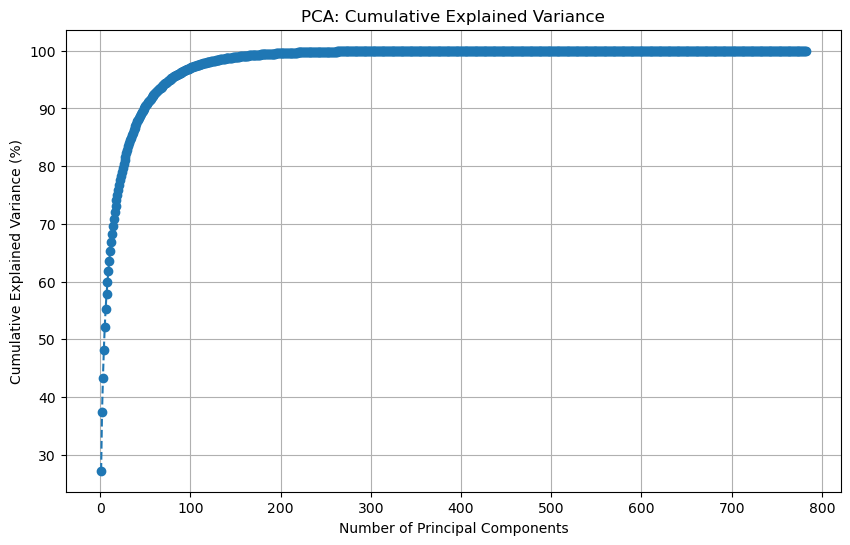

Components needed for 99% variance: 155


In [124]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_.cumsum()

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var)+1), explained_var*100, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True)
plt.show()

n_components = np.argmax(explained_var >= 0.99) + 1
print(f"Components needed for 99% variance: {n_components}")


In [125]:
# “If I use 155 new features (PCs), I keep 99% of the original variance.”

In [126]:
loadings = np.abs(pca.components_[0:155])  # PCs covering 99% variance
mean_loadings = loadings.mean(axis=0)


In [128]:
top_100_features = np.argsort(mean_loadings)[-100:]
top_100_feature_labels = X.columns[top_100_features]
X_selected = X[top_100_feature_labels]


In [129]:
# let's rebuild the model with the top 100 descriptors

le = LabelEncoder()
y_encoded = le.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, Y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

      active       0.77      0.86      0.81        81
    inactive       0.71      0.61      0.66        36
intermediate       0.57      0.50      0.53        40

    accuracy                           0.71       157
   macro avg       0.68      0.66      0.67       157
weighted avg       0.71      0.71      0.71       157

Confusion Matrix:
 [[70  0 11]
 [10 22  4]
 [11  9 20]]


In [130]:
# Feature selection has reduced dimensionality (from all features to 100) while maintaining improving performance — a win 
# for efficiency and interpretability.